In [106]:
#Importamos las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# plotly
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from sklearn import preprocessing
import squarify





Contamos con 5 datasets, los cuales tendremos que analizar para seleccionar los datos con los que trabajaremos. Iremos uniendo estos datasets con el objetivo de quedarnos con un dataframe final que contenga los campos que estamos buscando: cantidad de colegios por barrio, cantidad de colegios bilingües por barrios, cantida de centros de salud por barrio, cantidad de parques por barrio, proporción de niños (hasta 12 años) sobre la población total y precio medio por metro cuadrado de la vivienda por barrio.

<br>Contenido:
1. [Dataset de Centros Médicos](#1)
2. [Dataset de Colegios](#2)
3. [Dataset de Instalaciones Infantiles](#3)
4. [Dataset de Población](#4)
5. [Dataset de Precios de la Vivienda](#5)
6. [Nuevas variables (ratios)](#6)

<a id="1"></a> <br>
# Dataset de Centros Médicos

Comenzamos a trabajar con los datos de centros médicos de la web del Ayuntamiento de Madrid.

In [107]:
#Leemos el csv con los centros médicos del municipio de Madrid
todos_centros = pd.read_csv('data\centros_medicos_madrid.csv', sep = ';', encoding = 'latin')

Al mostrar los datos nos hemos percatado de que en la columna 'Nombre', tenemos 'Centro de Salud' y 'Centro de Salud Mental'. Solo nos interesan los 'Centros de Salud'

In [108]:
#Elimino los 'Centros de Salud Mental'
todos_centros = todos_centros.drop(todos_centros[todos_centros['NOMBRE'].str.contains('Centro de Salud Mental')].index)

In [109]:
#Seleciono solo los centros de salud y los asigno a un nuevo dataframe
centros_salud = todos_centros[todos_centros['NOMBRE'].str.contains('Centro de Salud')]

In [110]:
#Creamos nuevo dataframe solo con las columnas: 'NOMBRE', 'DISTRITO' Y 'BARRIO'
centros_salud_madrid = pd.DataFrame({'Nombre':centros_salud['NOMBRE'], 'Barrio':centros_salud['BARRIO'], 'Distrito':centros_salud['DISTRITO']})

In [111]:
#Agrupamos por distrito y barrio para obtener la cantidad de centros por cada barrio. Reseteamos los índices y cambiamos los nombres para obtener el resultado deseadol.
cant_centros_barrio = pd.DataFrame(centros_salud_madrid.groupby(['Distrito','Barrio']).count())
cant_centros_barrio.reset_index(inplace = True)
cant_centros_barrio.rename({'Nombre':'Cant_Centros_de_Salud'}, axis = 'columns', inplace = True)

In [112]:
#Mostramos el dataframe obtenido
cant_centros_barrio.head(5)

,Distrito,Barrio,Cant_Centros_de_Salud
0,ARGANZUELA,ACACIAS,1
1,ARGANZUELA,CHOPERA,1
2,ARGANZUELA,DELICIAS,1
3,ARGANZUELA,IMPERIAL,2
4,ARGANZUELA,LEGAZPI,1


In [113]:
cant_centros_barrio.to_csv('centros_medicos_prueba.csv', sep = ';')


Vamos observando en gráficas como es la distribución de esta variable por barrio.

In [114]:
%matplotlib inline

In [115]:
#Dibujamos el histograma para ver la frecuencia de los valores
trace1 = go.Histogram(x = cant_centros_barrio['Cant_Centros_de_Salud'],
                     opacity = 0.75,
                     name = 'Centros de Salud por Barrio',
                     marker = dict(color = 'rgba(0,0,150,0.6)'))


data = [trace1]
layout = go.Layout(barmode='overlay',
                   title= 'Centros de salud por Barrio',
                   xaxis=dict(title='Cantidad de Centros '),
                   yaxis=dict( title='Frecuencia'),
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

<a id="2"></a><br>
# Dataset de Colegios

Continuamos con el dataframe de los colegios de Madrid. De este nos interesa obtener la cantidad de colegios por barrio y la cantidad de colegios bilingües por barrio.

In [116]:
#Leemos el csv con los colegios de Madrid
todos_colegios = pd.read_csv('data\colegios_publicos.csv', sep = ';', encoding = 'latin')

In [117]:
# Exploramos los datos
todos_colegios.head()


,PK,NOMBRE,DESCRIPCION-ENTIDAD,HORARIO,EQUIPAMIENTO,TRANSPORTE,DESCRIPCION,ACCESIBILIDAD,CONTENT-URL,NOMBRE-VIA,...,DISTRITO,COORDENADA-X,COORDENADA-Y,LATITUD,LONGITUD,TELEFONO,FAX,EMAIL,TIPO,Unnamed: 30
0,176850,Colegio Público Adolfo Suárez,NaN,NaN,Comedor - Horario ampliado - Planes de mejora.,BUS: 174,ENSEÑANZAS: Segundo ciclo de E. Infantil - Pri...,0,http://www.madrid.es/sites/v/index.jsp?vgnextc...,INFANTA CATALINA MICAELA,...,HORTALEZA,444807,4482402,40.488603,-3.652554,917 502 058 / 676 562 792,917 502 058,NaN,/contenido/entidadesYorganismos/CentrosEducaci...,
1,5075,Colegio Público Agustina Díez,NaN,NaN,Comedor - Horario ampliado,"METRO: Alto del Arenal BUS: 54 , 58 , 103 , 143",ENSEÑANZA: Educación infantil - Primaria,0,http://www.madrid.es/sites/v/index.jsp?vgnextc...,VESUBIO,...,PUENTE DE VALLECAS,445067,4471046,40.388191,-3.647237,917 770 073,917 770 073,NaN,/contenido/entidadesYorganismos/CentrosEducaci...,
2,4693138,Colegio Público Agustín Rodriguez Sahagún,NaN,NaN,Horario ampliado - Comedor - Planes de mejora,Bus: 142,ENSEÑANZA: Educacion Infantil - Primaria - Ens...,0,http://www.madrid.es/sites/v/index.jsp?vgnextc...,LA GRANJA DE SAN ILDEFONSO,...,VILLA DE VALLECAS,447178,4468793,40.368040,-3.622168,913 324 348,914 941 475,NaN,/contenido/entidadesYorganismos/CentrosEducaci...,
3,5076,Colegio Público Alberto Alcocer,NaN,NaN,Comedor - Transporte - Horario ampliado - Plan...,"METRO: Las Musas BUS: 38 , 48 , 140, 153",ENSEÑANZA: Educación Infantil - Primaria - Ens...,0,http://www.madrid.es/sites/v/index.jsp?vgnextc...,CANILLEJAS A VICALVARO,...,SAN BLAS-CANILLEJAS,448087,4476035,40.433338,-3.612052,913 202 609,913 200 446,NaN,/contenido/entidadesYorganismos/CentrosEducaci...,
4,5077,Colegio Público Alcalde de Móstoles,NaN,NaN,Transporte - Comedor - Horario ampliado - Plan...,"BUS: 34 , 39 , 139 , 117 , 17 ,",ENSEÑANZA: Educación Infantil - Primaria,0,http://www.madrid.es/sites/v/index.jsp?vgnextc...,ALDEANUEVA DE LA VERA,...,LATINA,434091,4470207,40.379837,-3.776448,917 055 465,915 095 129,NaN,/contenido/entidadesYorganismos/CentrosEducaci...,


In [118]:
# Determinamos los colegios que son bilingües y añadimos una nueva columna
colegios_biling = []
for descr in todos_colegios['DESCRIPCION']:
    if 'Enseñanza biling' in descr:
        colegios_biling.append(1)
    else:
        colegios_biling.append(None)
todos_colegios['Bilingue'] = colegios_biling       


In [119]:
#Creamos nuevo dataframe solo con las columnas: 'NOMBRE', 'DISTRITO' , 'BARRIO' y 'Bilingue'
colegios_madrid = pd.DataFrame({'Nombre':todos_colegios['NOMBRE'],'Bilingue': todos_colegios['Bilingue'],'Barrio':todos_colegios['BARRIO'], 'Distrito':todos_colegios['DISTRITO']})

In [120]:
#Agrupamos por distrito y barrio, reseteamos índices y modificamos nombres de columnas
cant_colegios_barrio = pd.DataFrame(colegios_madrid.groupby(['Distrito','Barrio']).count())
cant_colegios_barrio.reset_index(inplace = True)
cant_colegios_barrio.rename({'Nombre':'Cant_Colegios', 'Bilingue':'Cant_Coleg_Bilingues'}, axis = 'columns', inplace = True)

In [121]:
#Mostramos el resultado:
cant_colegios_barrio.head()

,Distrito,Barrio,Cant_Colegios,Cant_Coleg_Bilingues
0,ARGANZUELA,ACACIAS,2,2
1,ARGANZUELA,ATOCHA,1,0
2,ARGANZUELA,DELICIAS,1,1
3,ARGANZUELA,IMPERIAL,3,1
4,ARGANZUELA,LEGAZPI,1,0


Comenzamos a unir dataframes, de momento los dos existentes (centros de salud y colegios)

In [122]:
#Unimos dataframes y mostramos el resultado
datos_barrios = cant_colegios_barrio.merge(cant_centros_barrio, on = 'Barrio', how = 'outer')
datos_barrios.head()

,Distrito_x,Barrio,Cant_Colegios,Cant_Coleg_Bilingues,Distrito_y,Cant_Centros_de_Salud
0,ARGANZUELA,ACACIAS,2.0,2.0,ARGANZUELA,1.0
1,ARGANZUELA,ATOCHA,1.0,0.0,NaN,NaN
2,ARGANZUELA,DELICIAS,1.0,1.0,ARGANZUELA,1.0
3,ARGANZUELA,IMPERIAL,3.0,1.0,ARGANZUELA,2.0
4,ARGANZUELA,LEGAZPI,1.0,0.0,ARGANZUELA,1.0


En algunos datasets hay información sobre barrios que en otros no hay. Queremos conservar la mayor cantidad de barrios posible.

In [123]:
#Revisamos los valores NaN en la columna distrito_x y los sustituimos por los valores en distrito_y. El objetivo es quedarnos con una única columna que contenga todos los distritos.
pos_nans = datos_barrios.loc[pd.isna(datos_barrios["Distrito_x"]), :].index

for value in pos_nans:
    datos_barrios['Distrito_x'][value] = datos_barrios['Distrito_y'][value]

datos_barrios.drop('Distrito_y', inplace = True, axis = 'columns')
datos_barrios.rename({'Distrito_x':'Distrito'}, axis = 'columns', inplace = True)


C:\Users\Jesús\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [124]:
#Vamos mostrando el resultado
datos_barrios.head()

,Distrito,Barrio,Cant_Colegios,Cant_Coleg_Bilingues,Cant_Centros_de_Salud
0,ARGANZUELA,ACACIAS,2.0,2.0,1.0
1,ARGANZUELA,ATOCHA,1.0,0.0,NaN
2,ARGANZUELA,DELICIAS,1.0,1.0,1.0
3,ARGANZUELA,IMPERIAL,3.0,1.0,2.0
4,ARGANZUELA,LEGAZPI,1.0,0.0,1.0


Observamos que hay valores NaN que se corresponden con la no existencia de centros en el barrio o con la ausencia de datos. En cualquier caso, convertiremos estos NaN a 0.

In [125]:
#Sustituyo los NaNs por 0
datos_barrios = datos_barrios.fillna(0)

In [126]:
#Modificamos el tipo de los datos numéricos a int
datos_barrios = datos_barrios.astype({'Cant_Colegios': 'int64', 'Cant_Coleg_Bilingues': 'int64', 'Cant_Centros_de_Salud': 'int64' })

In [127]:
#Coprobamos el resultado
datos_barrios.head()

,Distrito,Barrio,Cant_Colegios,Cant_Coleg_Bilingues,Cant_Centros_de_Salud
0,ARGANZUELA,ACACIAS,2,2,1
1,ARGANZUELA,ATOCHA,1,0,0
2,ARGANZUELA,DELICIAS,1,1,1
3,ARGANZUELA,IMPERIAL,3,1,2
4,ARGANZUELA,LEGAZPI,1,0,1


Al dibujar las variables que hemos incorporado vemos que ocurre algo similar a lo mostrado con la cantidad de centros por barrio. Variables con pocos valores y muchas frecuencias.

In [128]:
#Dibujamos histogramas. Esta vez de las tres variables.
trace1 = go.Histogram(x = datos_barrios['Cant_Centros_de_Salud'],
                     opacity = 0.75,
                     name = 'Centros de Salud por Barrio',
                     marker = dict(color = 'rgba(0,0,150,0.6)'))

trace2 = go.Histogram(x = datos_barrios['Cant_Colegios'],
                     opacity = 0.25,
                     name = 'Colegios por Barrio',
                     marker = dict(color = 'rgba(150,0,0,0.6)'))
                     
trace3 = go.Histogram(x = datos_barrios['Cant_Coleg_Bilingues'],
                     opacity = 0.50,
                     name = 'Colegios Bilingües por Barrio',
                     marker = dict(color = 'rgba(0,150,0,0.6)'))
data = [trace1, trace2, trace3]
layout = go.Layout(barmode='overlay',
                   title= 'Centros Barrio',
                   xaxis=dict(title='Cantidad de Centros '),
                   yaxis=dict( title='Frecuencia'),
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [129]:
# Mostramos subplots
from plotly.subplots import make_subplots
fig = make_subplots(
    rows=1, cols=3,
    subplot_titles=("Centros Médicos por Barrio", "Colegios por Barrio", "Colegios Bilingües por Barrio"))

fig.add_trace(go.Histogram(x = datos_barrios['Cant_Centros_de_Salud'],
                     opacity = 0.75,
                     name = 'Centros de Salud por Barrio',
                     marker = dict(color = 'rgba(0,0,150,0.6)')),row=1, col=1)

fig.add_trace(go.Histogram(x = datos_barrios['Cant_Colegios'],
                     opacity = 0.25,
                     name = 'Colegios por Barrio',
                     marker = dict(color = 'rgba(150,0,0,0.6)')),row=1, col=2)

fig.add_trace(go.Histogram(x = datos_barrios['Cant_Coleg_Bilingues'],
                     opacity = 0.50,
                     name = 'Colegios Bilingües por Barrio',
                     marker = dict(color = 'rgba(0,150,0,0.6)')),row=1, col=3)


fig.update_layout(height=300, width=1000,
                  title_text="Centros de Salud y Colegios por Barrio")

fig.show()


<a id="3"></a><br>
# Dataset de Instalaciones Infantiles

Pasamos a trabajar con el dataset de las instalaciones infantiles. Obtendremos la cantidad de estos para cada barrio.

In [130]:
#Leemos el csv con las instalaciones infantiles
parques = pd.read_csv('data\AREAS_INFANTILES_2021.csv', sep = ';', encoding = 'latin')

In [131]:
# Exploramos los datos
parques.head()


,"MXASSETNUM,C,12","DESCRIPTIO,C,105","MINTDISTRI,C,20","NOMBRE_DIS,C,25","MINTBARRIO,C,10","NOMBRE_BAR,C,50","INSTALLDAT,D","MINTTIPOVI,C,15","MINTNOMBRE,C,254","MINTNUMERO,C,25","MINTNDP,C,20","TIPO,C,254","TOTAL_ELEM,N,10,0","ESTADO,C,50"
0,16686,01032-Infantil-CUESTA DE SANTO DOMINGO 16,1,CENTRO,11,PALACIO,16/07/2007,NaN,NaN,NaN,11000193,INFANTIL,5,ACTIVO
1,16670,01017-Infantil-CALLE GRAN VIA DE SAN FRANCISCO 9,1,CENTRO,11,PALACIO,01/01/2004,NaN,NaN,NaN,31024773,INFANTIL,22,ACTIVO
2,16671,01018-Infantil-CALLE VENTOSA,1,CENTRO,11,PALACIO,01/01/2004,NaN,NaN,NaN,31041624,INFANTIL,10,ACTIVO
3,16667,01014-Infantil-CALLE DE ALGECIRAS,1,CENTRO,11,PALACIO,01/01/2004,NaN,NaN,NaN,31002275,INFANTIL,9,ACTIVO
4,16668,01015-Infantil-CALLE CUESTA DE LOS CIEGOS 2,1,CENTRO,11,PALACIO,01/01/2004,NaN,NaN,NaN,31040708,INFANTIL,25,ACTIVO


In [132]:
#Creamos nuevo dataframe solo con las columnas: 'NOMBRE', 'DISTRITO' y 'BARRIO' 
parques_barrio = pd.DataFrame({'Nombre': parques['DESCRIPTIO,C,105'],'Barrio': parques['NOMBRE_BAR,C,50'], 'Distrito': parques['NOMBRE_DIS,C,25']})

In [133]:
#Agrupamos por distrito y barrio, reseteamos los índices y modificamos nombres 
cant_parques_barrio = pd.DataFrame(parques_barrio.groupby(['Distrito','Barrio'])['Nombre'].count())
cant_parques_barrio.reset_index(inplace = True)
cant_parques_barrio.rename({'Nombre':'Cant_Parques'}, axis = 'columns', inplace = True)

In [134]:
#Observamos el resultado
cant_parques_barrio.head()

,Distrito,Barrio,Cant_Parques
0,ARGANZUELA,ACACIAS,16
1,ARGANZUELA,ATOCHA,7
2,ARGANZUELA,CHOPERA,7
3,ARGANZUELA,DELICIAS,13
4,ARGANZUELA,IMPERIAL,10


Unimos este dataframe al que tenemos conteniendo los datos de los anteriores datasets.

In [135]:
#hacemos el merge
datos_barrios = datos_barrios.merge(cant_parques_barrio, on = 'Barrio', how = 'outer')

In [136]:
datos_barrios

,Distrito_x,Barrio,Cant_Colegios,Cant_Coleg_Bilingues,Cant_Centros_de_Salud,Distrito_y,Cant_Parques
0,ARGANZUELA,ACACIAS,2.0,2.0,1.0,ARGANZUELA,16.0
1,ARGANZUELA,ATOCHA,1.0,0.0,0.0,ARGANZUELA,7.0
2,ARGANZUELA,DELICIAS,1.0,1.0,1.0,ARGANZUELA,13.0
3,ARGANZUELA,IMPERIAL,3.0,1.0,2.0,ARGANZUELA,10.0
4,ARGANZUELA,LEGAZPI,1.0,0.0,1.0,ARGANZUELA,16.0
...,...,...,...,...,...,...,...
128,NaN,AMPOSTA,NaN,NaN,NaN,SAN BLAS-CANILLEJAS,13.0
129,NaN,EL CAÑAVERAL,NaN,NaN,NaN,VICALVARO,7.0
130,NaN,VALDEBERNARDO,NaN,NaN,NaN,VICALVARO,16.0
131,NaN,VALDERRIVAS,NaN,NaN,NaN,VICALVARO,7.0


In [137]:
pos_nans = datos_barrios.loc[pd.isna(datos_barrios["Distrito_x"]), :].index
for value in pos_nans:
    datos_barrios['Distrito_x'][value] = datos_barrios['Distrito_y'][value]
    
datos_barrios.drop('Distrito_y', inplace = True, axis = 'columns')
datos_barrios.rename({'Distrito_x':'Distrito'}, axis = 'columns', inplace = True)


C:\Users\Jesús\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Al ir uniendo los dataframes se van generando nuevos NaNs debido a la no coincidencia de registros o a que estos sean 0. En cualquier caso, continuamos rellenándolos con 0

In [138]:
#Sustituyo los NaNs por 0
datos_barrios = datos_barrios.fillna(0)
datos_barrios = datos_barrios.astype({'Cant_Colegios': 'int64', 'Cant_Coleg_Bilingues': 'int64', 'Cant_Centros_de_Salud': 'int64', 'Cant_Parques':'int64' })

In [139]:
datos_barrios.head()

,Distrito,Barrio,Cant_Colegios,Cant_Coleg_Bilingues,Cant_Centros_de_Salud,Cant_Parques
0,ARGANZUELA,ACACIAS,2,2,1,16
1,ARGANZUELA,ATOCHA,1,0,0,7
2,ARGANZUELA,DELICIAS,1,1,1,13
3,ARGANZUELA,IMPERIAL,3,1,2,10
4,ARGANZUELA,LEGAZPI,1,0,1,16


Visualizamos para ir observando el comportamiento de nuestras variables

In [140]:
trace = go.Histogram(x = datos_barrios['Cant_Parques'],
                     opacity = 0.75,
                     marker = dict(color = 'rgba(0,255,200,0.6)'))

data = [trace]
layout = go.Layout(barmode='overlay',
                   title= 'Intalaciones Infantiles por Barrio',
                   xaxis=dict(title='Cantidad de Instalaciones '),
                   yaxis=dict( title='Frecuencia'),
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

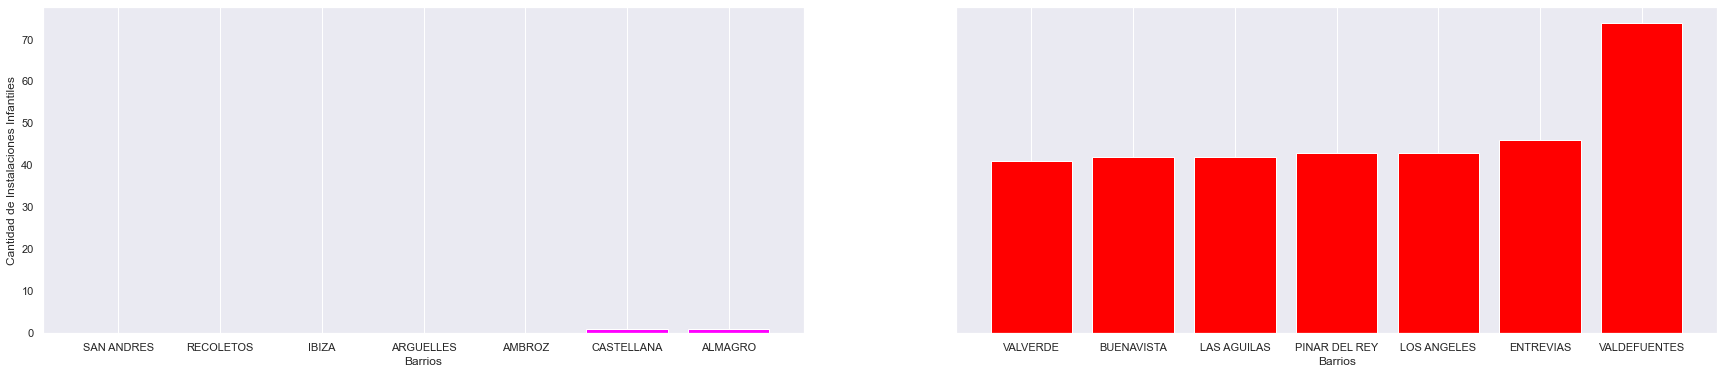

In [141]:
sns.set_theme()
min_parques = datos_barrios.sort_values('Cant_Parques', ascending = True).head(7)
max_parques = datos_barrios.sort_values('Cant_Parques', ascending = True).tail(7)
f, axes = plt.subplots(1,2, figsize=(30,6), sharex=False, sharey = True) 
axes[0].bar(min_parques['Barrio'],min_parques['Cant_Parques'], color = 'magenta')
axes[0].set_xlabel('Barrios')
axes[0].set_ylabel('Cantidad de Instalaciones Infantiles')
axes[0].grid(axis = 'y')
axes[1].bar(max_parques['Barrio'],max_parques['Cant_Parques'], color = 'red')
axes[1].set_xlabel('Barrios')
axes[1].grid(axis = 'y')



<a id="4"></a><br>
# Dataset de Población

Pasamos a trabajar con el dataset de la población por barrios. De este queremos quedarnos con la cantidad de población total por barrio y con la cantidad de niños (tomando como rango de 0 a 12 años)

In [142]:
#Leemos el csv con la información del padrón municipal
poblacion = pd.read_csv('data\Rango_Edades_Seccion_202110.csv', sep = ';', encoding = 'latin',skipinitialspace= True)

In [143]:
poblacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238148 entries, 0 to 238147
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   COD_DISTRITO        238148 non-null  int64  
 1   DESC_DISTRITO       238148 non-null  object 
 2   COD_DIST_BARRIO     238148 non-null  int64  
 3   DESC_BARRIO         238148 non-null  object 
 4   COD_BARRIO          238148 non-null  int64  
 5   COD_DIST_SECCION    238148 non-null  int64  
 6   COD_SECCION         238148 non-null  int64  
 7   COD_EDAD_INT        238148 non-null  int64  
 8   EspanolesHombres    221476 non-null  float64
 9   EspanolesMujeres    232135 non-null  float64
 10  ExtranjerosHombres  104164 non-null  float64
 11  ExtranjerosMujeres  114401 non-null  float64
dtypes: float64(4), int64(6), object(2)
memory usage: 21.8+ MB


In [144]:
# Exploramos los datos
poblacion.head()


,COD_DISTRITO,DESC_DISTRITO,COD_DIST_BARRIO,DESC_BARRIO,COD_BARRIO,COD_DIST_SECCION,COD_SECCION,COD_EDAD_INT,EspanolesHombres,EspanolesMujeres,ExtranjerosHombres,ExtranjerosMujeres
0,1,CENTRO,101,PALACIO,1,1006,6,97,1.0,1.0,NaN,NaN
1,1,CENTRO,101,PALACIO,1,1006,6,98,NaN,1.0,NaN,NaN
2,1,CENTRO,101,PALACIO,1,1006,6,99,1.0,1.0,NaN,NaN
3,1,CENTRO,101,PALACIO,1,1006,6,101,NaN,1.0,NaN,NaN
4,1,CENTRO,101,PALACIO,1,1006,6,104,NaN,1.0,NaN,NaN


In [145]:
#Rellenamos los NaN con 0 y convertimos el tipo de las columnas a int
poblacion = poblacion.fillna(0)
poblacion = poblacion.astype({'EspanolesHombres':'int64', 'EspanolesMujeres':'int64', 'ExtranjerosHombres':'int64','ExtranjerosMujeres':'int64'})


In [146]:
#Creamos nueva columna con el total de habitantes por edad sin distinguir sexo ni nacionalidad
poblacion['Total_pob'] = poblacion['EspanolesHombres'] + poblacion['EspanolesMujeres'] + poblacion['ExtranjerosHombres'] + poblacion['ExtranjerosMujeres']

In [147]:
total_pob_barrios = pd.DataFrame(poblacion.groupby(['DESC_DISTRITO','DESC_BARRIO'])['Total_pob'].sum())

In [148]:
#Reseteamos los índices y cambiamos nombres de las columnas resultantes
total_pob_barrios.reset_index(inplace = True)
total_pob_barrios.rename({'DESC_DISTRITO':'Distrito', 'DESC_BARRIO':'Barrio', 'Total_pob':'Pob_total' }, axis = 'columns', inplace = True)

In [149]:
total_pob_barrios.head()

,Distrito,Barrio,Pob_total
0,ARGANZUELA,ACACIAS,36274
1,ARGANZUELA,ATOCHA,1594
2,ARGANZUELA,CHOPERA,19940
3,ARGANZUELA,DELICIAS,28358
4,ARGANZUELA,IMPERIAL,22550


Calcularemos la población menor de 12 años para cada barrio.

In [150]:
#Población menor de 12 años.
poblacion_infantil = poblacion[poblacion['COD_EDAD_INT'] <= 12]
cant_inf_barrios = pd.DataFrame(poblacion_infantil.groupby(['DESC_DISTRITO','DESC_BARRIO'])['Total_pob'].sum())

In [151]:
#Reseteamos los índices y cambiamos nombres de las columnas resultantes
cant_inf_barrios.reset_index(inplace = True)
cant_inf_barrios.rename({'DESC_DISTRITO':'Distrito', 'DESC_BARRIO':'Barrio', 'Total_pob':'Pob_inf' }, axis = 'columns', inplace = True)

In [152]:
cant_inf_barrios.head()

,Distrito,Barrio,Pob_inf
0,ARGANZUELA,ACACIAS,2869
1,ARGANZUELA,ATOCHA,235
2,ARGANZUELA,CHOPERA,1782
3,ARGANZUELA,DELICIAS,3096
4,ARGANZUELA,IMPERIAL,1981


In [153]:
#hacemos el merge entre los dos dataframes
datos_pob_barrios = total_pob_barrios.merge(cant_inf_barrios, on = 'Barrio', how = 'outer')


In [154]:
#Revisamos los valores NaN en la columna distrito_x y los sustituimos por los valores en distrito_y. El objetivo es quedarnos con una única columna que contenga todos los distritos.
datos_pob_barrios.drop('Distrito_y', inplace = True, axis = 'columns')
datos_pob_barrios.rename({'Distrito_x':'Distrito'}, axis = 'columns', inplace = True)
datos_pob_barrios = datos_pob_barrios.fillna(0)
datos_pob_barrios = datos_pob_barrios.astype({'Pob_inf':'int64'})

Revisando nuestro dataframe nos percatamos de que hay un barrio que tiene registrado un único habitante. Aparentemenet es una barrio en nueva construcción cuyo registro no nos interesa por lo que lo eliminaremos.

In [155]:
#Comprobamos que hay un barrio con un único habitante registrado
datos_pob_barrios[datos_pob_barrios['Pob_inf'] == 0]

,Distrito,Barrio,Pob_total,Pob_inf
61,LATINA,BARRIOS EN EDIF. BDC,1,0


In [156]:
#Lo eliminamos
datos_pob_barrios.drop(datos_pob_barrios[datos_pob_barrios['Barrio'] == 'BARRIOS EN EDIF. BDC'].index, inplace = True)

In [157]:
#Añadimos columna con el ratio niños/adultos
datos_pob_barrios['Ratio_inf_total'] = datos_pob_barrios['Pob_inf'] / datos_pob_barrios['Pob_total']
datos_pob_barrios = datos_pob_barrios.round({'Ratio_inf_total':3})

Uniremos este último dataframe con los anteriores

Al intentar hacer un merge posterior, descubro que no se hace por la existencia de espacios en la columna 'Barrio' del dataframe 'datos_pob_barrios'. Eliminamos esos espacios

In [158]:
#Eliminamos los espacios ya que hemos descubierto al intentar hacer el merge posterior que no coincidían los valores. Ocurre con las columnas 'distrito' y 'barrio'
datos_pob_barrios['Barrio'] = datos_pob_barrios['Barrio'].str.rstrip()
datos_pob_barrios['Distrito'] = datos_pob_barrios['Distrito'].str.rstrip() 

In [159]:
#Lo unimos tomando como primer dataframe el de población. De momento conservaré todos los barrios, incluidos los que no tengan datos del resto de aspectos
datos_barrios = datos_pob_barrios.merge(datos_barrios, on = 'Barrio', how = 'outer')

In [160]:
#Comprobamos el resultado
datos_barrios.head()

,Distrito_x,Barrio,Pob_total,Pob_inf,Ratio_inf_total,Distrito_y,Cant_Colegios,Cant_Coleg_Bilingues,Cant_Centros_de_Salud,Cant_Parques
0,ARGANZUELA,ACACIAS,36274.0,2869.0,0.079,ARGANZUELA,2.0,2.0,1.0,16.0
1,ARGANZUELA,ATOCHA,1594.0,235.0,0.147,ARGANZUELA,1.0,0.0,0.0,7.0
2,ARGANZUELA,CHOPERA,19940.0,1782.0,0.089,ARGANZUELA,0.0,0.0,1.0,7.0
3,ARGANZUELA,DELICIAS,28358.0,3096.0,0.109,ARGANZUELA,1.0,1.0,1.0,13.0
4,ARGANZUELA,IMPERIAL,22550.0,1981.0,0.088,ARGANZUELA,3.0,1.0,2.0,10.0


El sigiuiente código lo hice para intentar descubrir la razón por la que no se estaba haciendo un merge correctamente. Lo dejamos comentado porque ya solucionado el error no es necesario.

In [161]:
#cadena = datos_pob_barrios['Barrio'][0]
#print(cadena)
#lista_caract = []
#for valor in cadena:
    #lista_caract.append(valor)
#print(lista_caract)    '''

Continuamos limpiando los datos.

In [162]:
#El barrio de Ambroz fue absorbido por el casco histórico de Vicálvaro. Lo eliminamos
# Por otra parte, el barrio 'San Andrés' se convirtió en el Casco Histórico de Villaverde Alto ('VILLAVERDE ALTO C.H.). Por tanto, asignaremos sus datos a este y lo eliminaremos
datos_barrios['Cant_Colegios'][131] = datos_barrios['Cant_Colegios'][133]
datos_barrios['Cant_Coleg_Bilingues'][131] = datos_barrios['Cant_Coleg_Bilingues'][133]
datos_barrios['Cant_Centros_de_Salud'][131] = datos_barrios['Cant_Centros_de_Salud'][133]
datos_barrios.drop(datos_barrios[datos_barrios['Barrio']== 'AMBROZ'].index, inplace = True)
datos_barrios.drop(datos_barrios[datos_barrios['Barrio']== 'SAN ANDRES'].index, inplace = True)

C:\Users\Jesús\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Jesús\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Jesús\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [163]:
datos_barrios.head()

,Distrito_x,Barrio,Pob_total,Pob_inf,Ratio_inf_total,Distrito_y,Cant_Colegios,Cant_Coleg_Bilingues,Cant_Centros_de_Salud,Cant_Parques
0,ARGANZUELA,ACACIAS,36274.0,2869.0,0.079,ARGANZUELA,2.0,2.0,1.0,16.0
1,ARGANZUELA,ATOCHA,1594.0,235.0,0.147,ARGANZUELA,1.0,0.0,0.0,7.0
2,ARGANZUELA,CHOPERA,19940.0,1782.0,0.089,ARGANZUELA,0.0,0.0,1.0,7.0
3,ARGANZUELA,DELICIAS,28358.0,3096.0,0.109,ARGANZUELA,1.0,1.0,1.0,13.0
4,ARGANZUELA,IMPERIAL,22550.0,1981.0,0.088,ARGANZUELA,3.0,1.0,2.0,10.0


In [164]:
datos_barrios.drop('Distrito_y', inplace = True, axis = 'columns')
datos_barrios.rename({'Distrito_x':'Distrito'}, axis = 'columns', inplace = True)

In [165]:
#Rellenamos NaN en caso de que los hubiera
datos_barrios = datos_barrios.fillna(0)
#Convertimos datos  de float a int
datos_barrios = datos_barrios.astype({'Pob_total':'int64', 'Pob_inf':'int64', 'Cant_Colegios':'int64', 'Cant_Coleg_Bilingues':'int64','Cant_Centros_de_Salud':'int64', 'Cant_Parques':'int64'})

Comenzamos con las visualizaciones de datos relativos a la población

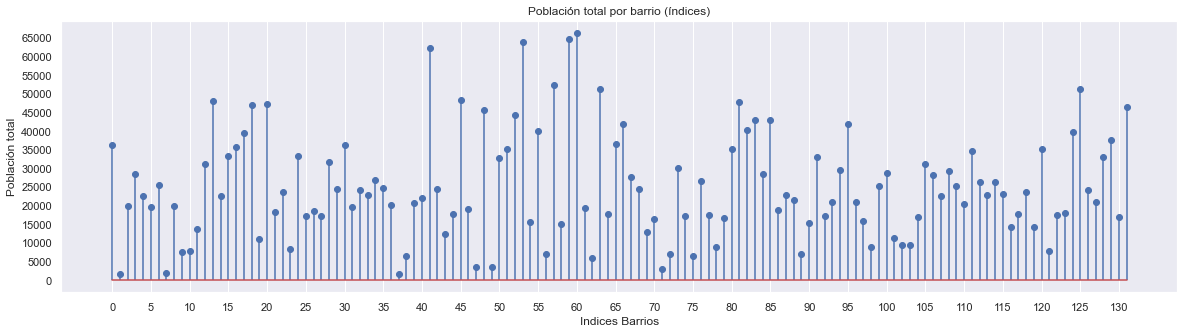

In [166]:
plt.figure(figsize=(20,5))
plt.grid(axis = 'y')
plt.stem(datos_barrios['Pob_total'])
plt.xlabel('Indices Barrios')
plt.ylabel('Población total')
plt.title('Población total por barrio (índices)')
plt.xticks(range(0, 135, 5))
plt.yticks(range(0, 70000, 5000));

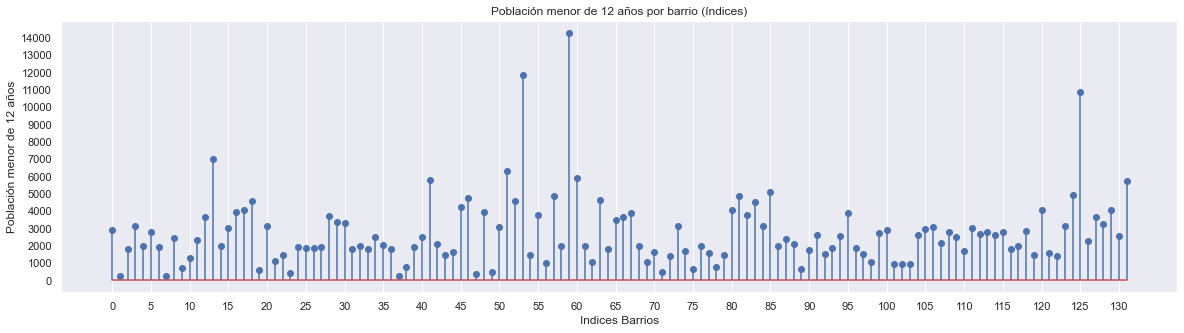

In [167]:
plt.figure(figsize=(20,5))
plt.grid(axis = 'y')
plt.stem(datos_barrios['Pob_inf'])
plt.xlabel('Indices Barrios')
plt.ylabel('Población menor de 12 años')
plt.title('Población menor de 12 años por barrio (índices)')
plt.xticks(range(0, 135, 5))
plt.yticks(range(0, 15000, 1000));


Text(0.5, 1.0, 'Proporción de adultos y niños sobre la población total (Madrid Capital)')

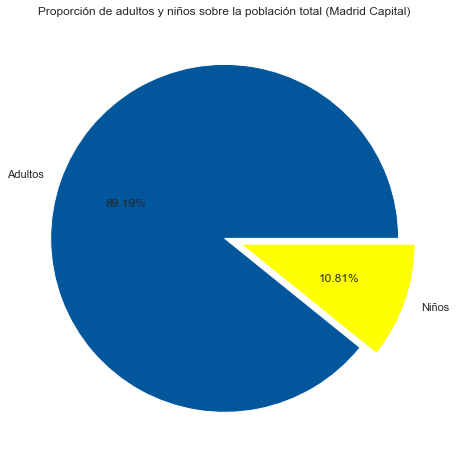

In [168]:
#Mostramos proporciones para Madrid Capital
suma_ni = datos_barrios['Pob_inf'].sum()
suma_adult = datos_barrios['Pob_total'].sum() - suma_ni
pob_esp = 47431256
pob_es_ni = 5322873
adult_esp = pob_esp - pob_es_ni
data_mad = pd.Series({'Adultos':suma_adult,'Niños':suma_ni})
plt.figure(figsize=(8,8))
plt.pie(data_mad.values,
        labels = data_mad.index,
        explode = (0, 0.1),
        colors = ['#02569c', '#ffff01'],
        autopct='%1.2f%%')
plt.title('Proporción de adultos y niños sobre la población total (Madrid Capital)')        

        

Text(0.5, 1.0, 'Proporción de adultos y niños sobre la población total (España)')

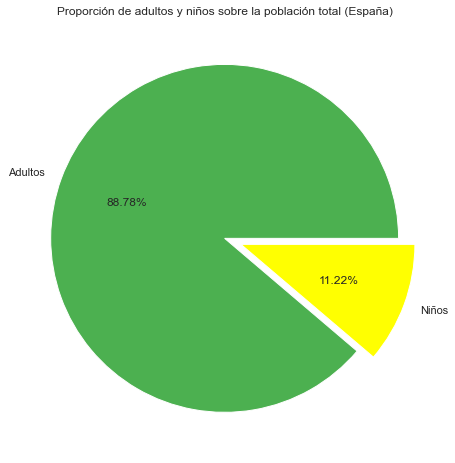

In [169]:
#Esto lo hacemos para incluir una comparación con los datos nacionales
data_es = pd.Series({'Adultos':adult_esp,'Niños':pob_es_ni})
plt.figure(figsize=(8,8))
plt.pie(data_es.values,
        labels = data_es.index,
        explode = (0, 0.1),
        colors = ['#4cb050', '#ffff01'],
        autopct='%1.2f%%')
plt.title('Proporción de adultos y niños sobre la población total (España)')   

Text(0.5, 0, 'PALACIO')

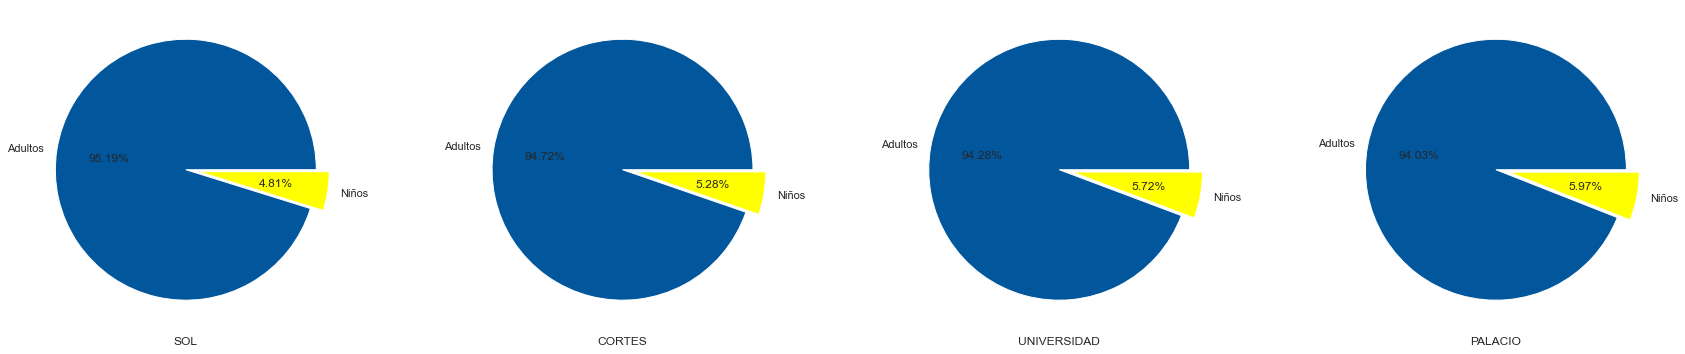

In [170]:


#Dibujamos subplots con las proporciones de los barrios más envejecidos y los menos
sns.set_theme()
data_olders = datos_barrios.sort_values('Ratio_inf_total', ascending = True).head(4)
data_youngers = datos_barrios.sort_values('Ratio_inf_total', ascending = True).tail(4)
lista_dic_old = []
for indice in data_olders.index:
    dic_olders = {}
    dic_olders['Adultos'] = data_olders['Pob_total'][indice] - data_olders['Pob_inf'][indice]
    dic_olders['Niños'] = data_olders['Pob_inf'][indice]
    lista_dic_old.append(dic_olders)

f1, axes1 = plt.subplots(1,4, figsize=(30,6), sharex=False, sharey = False) 
serie_1_olders = pd.Series(lista_dic_old[0])
axes1[0].pie(serie_1_olders.values,labels = serie_1_olders.index,explode = (0, 0.1),colors = ['#02569c', '#ffff01'],autopct='%1.2f%%')
axes1[0].set_xlabel(data_olders['Barrio'][data_olders.index[0]])

serie_2_olders = pd.Series(lista_dic_old[1])
axes1[1].pie(serie_2_olders.values,labels = serie_2_olders.index,explode = (0, 0.1),colors = ['#02569c', '#ffff01'],autopct='%1.2f%%')
axes1[1].set_xlabel(data_olders['Barrio'][data_olders.index[1]])

serie_3_olders = pd.Series(lista_dic_old[2])
axes1[2].pie(serie_3_olders.values,labels = serie_3_olders.index,explode = (0, 0.1),colors = ['#02569c', '#ffff01'],autopct='%1.2f%%')
axes1[2].set_xlabel(data_olders['Barrio'][data_olders.index[2]])

serie_4_olders = pd.Series(lista_dic_old[3])
axes1[3].pie(serie_4_olders.values,labels = serie_4_olders.index,explode = (0, 0.1),colors = ['#02569c', '#ffff01'],autopct='%1.2f%%')
axes1[3].set_xlabel(data_olders['Barrio'][data_olders.index[3]])


Text(0.5, 0, 'EL GOLOSO')

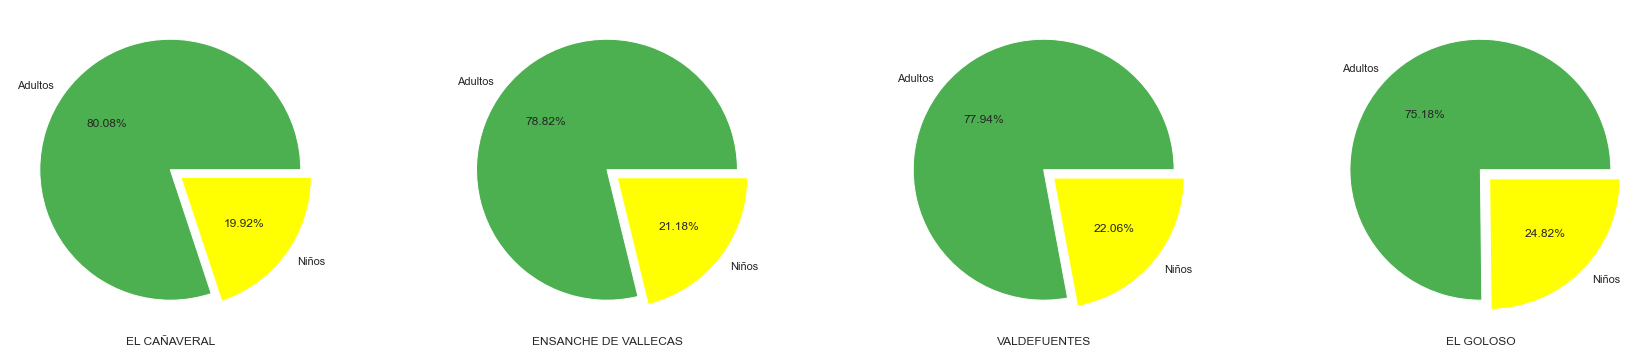

In [171]:
#Hacemos los subplots para los barrios con más niños
lista_dic_young = []
for indice in data_youngers.index:
    dic_young = {}
    dic_young['Adultos'] = data_youngers['Pob_total'][indice] - data_youngers['Pob_inf'][indice]
    dic_young['Niños'] = data_youngers['Pob_inf'][indice]
    lista_dic_young.append(dic_young)

f2, axes2 = plt.subplots(1,4, figsize=(30,6), sharex=False, sharey = False) 
serie_1_young = pd.Series(lista_dic_young[0])
axes2[0].pie(serie_1_young.values,labels = serie_1_young.index,explode = (0, 0.1),colors = ['#4cb050', '#ffff01'],autopct='%1.2f%%')
axes2[0].set_xlabel(data_youngers['Barrio'][data_youngers.index[0]])

serie_2_young = pd.Series(lista_dic_young[1])
axes2[1].pie(serie_2_young.values,labels = serie_2_young.index,explode = (0, 0.1),colors = ['#4cb050', '#ffff01'],autopct='%1.2f%%')
axes2[1].set_xlabel(data_youngers['Barrio'][data_youngers.index[1]])

serie_3_young = pd.Series(lista_dic_young[2])
axes2[2].pie(serie_3_young.values,labels = serie_3_young.index,explode = (0, 0.1),colors = ['#4cb050', '#ffff01'],autopct='%1.2f%%')
axes2[2].set_xlabel(data_youngers['Barrio'][data_youngers.index[2]])

serie_4_young = pd.Series(lista_dic_young[3])
axes2[3].pie(serie_4_young.values,labels = serie_4_young.index,explode = (0, 0.1),colors = ['#4cb050', '#ffff01'],autopct='%1.2f%%')
axes2[3].set_xlabel(data_youngers['Barrio'][data_youngers.index[3]])

<a id="5"></a><br>
# Dataset de Precios de la Vivienda

Faltan por añadir los datos relativos al precio medio del metro cuadrado de la vivienda por barrios. Este dataset es el que más dificultades va a generar para poder unirlo al dataframe que tenemos con los datos anteriores, debido a que los nombres de los barrios no están en el mismo formato que los que ya hemos incorporado.

In [172]:
#Leemos el xls con los datos de precios de vivienda por barrio
precios = pd.read_excel('data\Precio_vivienda_barrios.xls',sheet_name= 'E3320221', header = 4)

In [173]:
precios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  0 non-null      float64
 1   Distrito    164 non-null    object 
 2   2020        161 non-null    object 
 3   2019        161 non-null    object 
dtypes: float64(1), object(3)
memory usage: 6.0+ KB


In [174]:
#Observamos los datos
precios.head()

,Unnamed: 0,Distrito,2020,2019
0,NaN,NaN,NaN,NaN
1,NaN,Ciudad de Madrid,3682,3732
2,NaN,NaN,NaN,NaN
3,NaN,01. Centro,4865,5096
4,NaN,011. Palacio,4703,4852


In [175]:
#Eliminamos la columna Unnamed: 0
precios.drop('Unnamed: 0', axis = 'columns', inplace = True)

In [176]:
#Nos quedamos con los precios de 2020, eliminamos las filas con NaNs y reseteamos los índices
precios_2020 = pd.DataFrame({'Barrio':precios['Distrito'],'Precio/m2':precios[2020]})
precios_2020.dropna(axis = 0, inplace = True)
precios_2020.reset_index(inplace = True)

In [177]:
#Con este código, intentamos obtener una lista con el "comienzo" de los nombres de los barrios para intentar compararlos con los del dataframe de precios
lista_barrios = []
for barrio in datos_barrios['Barrio']:
    band = False
    cont = 0
    palabra = ''
    while band == False and cont < (len(barrio)):
        if (barrio[cont] != ' '):
            palabra += barrio[cont]
            cont += 1
        elif (barrio[cont] == ' ') and (cont < 4):
            palabra += barrio[cont]
            cont += 1
        else:    
            band = True
    lista_barrios.append(palabra)

El siguiente código es para intentar encontrar todas las coincidencias posibles entre los barrios de los dataframes.

In [178]:
#Convierto a mayúscula todos los barrios del dataframe "precios_2020"
for pos,i in enumerate(precios_2020['Barrio']):
    precios_2020['Barrio'][pos] = precios_2020['Barrio'][pos].upper()
precios_2020
#Recorremos la columna barrios de "precios_2020".Donde hay coincidencia, sustituyo el nombre del barrio por el de "datos_barrios". Guardo una lista con los índices en los que ha habido coincidencia.
lista_ind = []
for pos_i,barrio in enumerate(precios_2020.Barrio):
    for pos_j, barrio_list in enumerate(lista_barrios):
        if barrio_list in barrio:
            precios_2020.Barrio[pos_i] = datos_barrios.Barrio[pos_j]
            lista_ind.append(pos_i) 

C:\Users\Jesús\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Jesús\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [179]:
#Observamos el resultado
precios_2020.head()

,index,Barrio,Precio/m2
0,1,CIUDAD UNIVERSITARIA,3682
1,3,01. CENTRO,4865
2,4,PALACIO,4703
3,5,EMBAJADORES,4180
4,6,CORTES,5206


Observamos que las dos primeras filas son valores erróneos

In [180]:
#Eliminamos esos valores
lista_ind_def = lista_ind[2:]

In [181]:
#Nos quedamos solo con los valores que han coincidido y eliminamos la columna "index"
precios_barrios = precios_2020.iloc[lista_ind_def]
precios_barrios.drop('index', axis = 'columns', inplace = True)

C:\Users\Jesús\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\frame.py:4908: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



A partir de este punto, ya unimos el dataframe de precios a nuestro dataframe "datos_barrios

In [182]:
#Ejecutamos el merge
datos_barrios = datos_barrios.merge(precios_barrios, on = 'Barrio', how = 'left')

In [183]:
#Observamos el resultado
datos_barrios.head()

,Distrito,Barrio,Pob_total,Pob_inf,Ratio_inf_total,Cant_Colegios,Cant_Coleg_Bilingues,Cant_Centros_de_Salud,Cant_Parques,Precio/m2
0,ARGANZUELA,ACACIAS,36274,2869,0.079,2,2,1,16,4015
1,ARGANZUELA,ATOCHA,1594,235,0.147,1,0,0,7,3888
2,ARGANZUELA,CHOPERA,19940,1782,0.089,0,0,1,7,3598
3,ARGANZUELA,DELICIAS,28358,3096,0.109,1,1,1,13,3864
4,ARGANZUELA,IMPERIAL,22550,1981,0.088,3,1,2,10,3895


En la observación de los datos vemos que hay varios duplicados y observamos que tenemos varios valores NaN en los precios. En esta caso nos interesa que todos los barrios tengan el precio relacionado.

In [184]:
#Eliminamos duplicados
datos_barrios.drop_duplicates(subset = 'Barrio', keep = 'first', inplace = True)
#Buscamos los NaN
precios_na = datos_barrios[datos_barrios.isna().any(axis = 1)]

Con algo de manualidad, recopilo los datos de los precios que me faltan en un diccionario.

In [185]:
dict_precios = {'CASCO H.BARAJAS':2765,'TIMON':3381,'BUENAVISTA':1958,
                'PUERTA BONITA':1950,'CIUDAD JARDIN':4314,'HISPANOAMERICA':5204,'RIOS ROSAS':5161,'CONCEPCION':3053,
'EL PILAR':3146,'FUENTELARREINA':3286,'APOSTOL SANTIAGO':2999,
'VALDEFUENTES':4016,'CUATRO VIENTOS':2270,'LAS AGUILAS':2155,'LOS CARMENES':2395,'ARGUELLES':4844,'EL PLANTIO':2690,'VALDEMARIN':4070,
 'FONTARRON':2220, 'FONTARRON':2220,'ENTREVIAS':1501,'PALOMERAS BAJAS':1935,
'LOS JERONIMOS':6917,'PACIFICO':4096,'EL SALVADOR':3387,'HELLIN':1905,
'MOSCARDO':2252,'SAN FERMIN':1863,'CASCO H.VICALVARO':2059,'EL CAÑAVERAL':2733,
'VALDEBERNARDO':2973,'VALDERRIVAS':2973,'LOS ANGELES':1824,'SAN CRISTOBAL':1356}

In [186]:
#Ejecutamos código para sustituir estos valores en el dataframe
for item in dict_precios.items():
    datos_barrios['Precio/m2'][datos_barrios['Barrio'] == item[0]] = item[1]

C:\Users\Jesús\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Intentamos convertir el precio a int pero nos encontramos con que hay tres datos que en lugar de número contienen '..'

In [187]:
datos_barrios[datos_barrios['Precio/m2'] == '..']

,Distrito,Barrio,Pob_total,Pob_inf,Ratio_inf_total,Cant_Colegios,Cant_Coleg_Bilingues,Cant_Centros_de_Salud,Cant_Parques,Precio/m2
7,BARAJAS,AEROPUERTO,1890,253,0.134,0,0,0,2,..
50,FUENCARRAL-EL PARDO,EL GOLOSO,19097,4740,0.248,2,0,0,7,..
92,MORATALAZ,HORCAJO,6366,646,0.101,0,0,0,4,..


In [188]:
#sustituimos estos valores
datos_barrios['Precio/m2'][datos_barrios['Barrio'] == 'AEROPUERTO'] = 2361
datos_barrios['Precio/m2'][datos_barrios['Barrio'] == 'EL GOLOSO'] = 3045
datos_barrios['Precio/m2'][datos_barrios['Barrio'] == 'HORCAJO'] = 3084

C:\Users\Jesús\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Jesús\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Jesús\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [189]:
#Convertimos el precio a int
datos_barrios = datos_barrios.astype({'Precio/m2': 'int64'})

In [190]:
#Observamos nuestro dataframe "final"
datos_barrios

,Distrito,Barrio,Pob_total,Pob_inf,Ratio_inf_total,Cant_Colegios,Cant_Coleg_Bilingues,Cant_Centros_de_Salud,Cant_Parques,Precio/m2
0,ARGANZUELA,ACACIAS,36274,2869,0.079,2,2,1,16,4015
1,ARGANZUELA,ATOCHA,1594,235,0.147,1,0,0,7,3888
2,ARGANZUELA,CHOPERA,19940,1782,0.089,0,0,1,7,3598
3,ARGANZUELA,DELICIAS,28358,3096,0.109,1,1,1,13,3864
4,ARGANZUELA,IMPERIAL,22550,1981,0.088,3,1,2,10,3895
...,...,...,...,...,...,...,...,...,...,...
185,VILLAVERDE,BUTARQUE,20904,3635,0.174,3,0,0,10,2084
186,VILLAVERDE,LOS ANGELES,32934,3238,0.098,4,1,1,43,1824
187,VILLAVERDE,LOS ROSALES,37558,4015,0.107,3,0,2,25,1854
188,VILLAVERDE,SAN CRISTOBAL,16847,2546,0.151,4,1,1,17,1356


In [191]:
#Mostramos algunos valores estadísticos
datos_barrios.describe()

,Pob_total,Pob_inf,Ratio_inf_total,Cant_Colegios,Cant_Coleg_Bilingues,Cant_Centros_de_Salud,Cant_Parques,Precio/m2
count,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000
mean,25226.717557,2726.908397,0.108771,1.862595,0.687023,0.984733,15.603053,3383.625954
std,14029.251398,2019.557573,0.033526,1.704128,0.868987,0.784315,12.235308,1324.444559
min,1594.000000,202.000000,0.048000,0.000000,0.000000,0.000000,0.000000,1356.000000
25%,16924.500000,1626.500000,0.089000,1.000000,0.000000,0.000000,7.000000,2222.500000
50%,22845.000000,2280.000000,0.099000,1.000000,0.000000,1.000000,13.000000,3227.000000
75%,33300.000000,3387.500000,0.118000,3.000000,1.000000,1.000000,20.000000,4142.000000
max,66270.000000,14255.000000,0.248000,7.000000,4.000000,3.000000,74.000000,8429.000000


In [192]:
datos_barrios[datos_barrios['Barrio'] == 'JUSTICIA']

,Distrito,Barrio,Pob_total,Pob_inf,Ratio_inf_total,Cant_Colegios,Cant_Coleg_Bilingues,Cant_Centros_de_Salud,Cant_Parques,Precio/m2
25,CENTRO,JUSTICIA,18235,1089,0.06,1,1,1,6,5641


In [193]:
#Mostramos la mediana
datos_barrios['Precio/m2'].median()

3227.0

C:\Users\Jesús\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



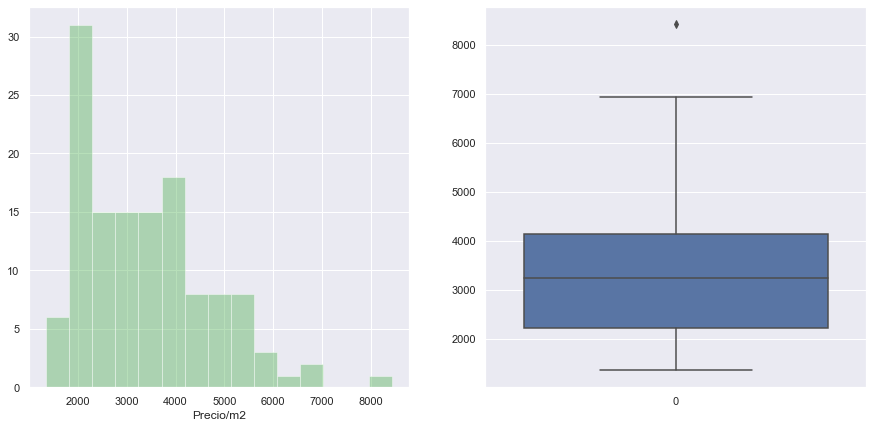

In [194]:
sns.set_theme()
f, axes = plt.subplots(1, 2, figsize=(15,7), sharex=False, sharey = False)
sns.distplot(datos_barrios['Precio/m2'] , kde = False, color="#4db050",bins = 15, label="Precio/m2", ax = axes[0])
plt.xticks([0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000])
sns.boxplot(data = datos_barrios['Precio/m2'], ax = axes[1]);

<a id="6"></a><br>
# Nuevas variables (ratios)

Como hemos observado, varios de los datos numéricos (Cant_Colegios, Cant_Coleg_Bilingues, Cant_Centros_de_Salud, Cant_Parques) nos brindan información poco útil para nuestro análisis. Necesitamos nuevas variables que relacionen estos valores con la cantidad de niños en el barrio.

In [195]:
#Creamos nuevas columnas con los ratios en lugar de los valores literales
datos_barrios['Ratio_col_inf'] = datos_barrios['Cant_Colegios'] / datos_barrios['Pob_inf']
datos_barrios['Ratio_c_biling_inf']= datos_barrios['Cant_Coleg_Bilingues'] / datos_barrios['Pob_inf']
datos_barrios['Ratio_c_salud_inf'] = datos_barrios['Cant_Centros_de_Salud'] / datos_barrios['Pob_inf']
datos_barrios['Ratio_parq_inf'] = datos_barrios['Cant_Parques'] / datos_barrios['Pob_inf']

In [196]:
#Observamos el dataframe resultante
datos_barrios.reset_index(inplace = True)
datos_barrios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  131 non-null    int64  
 1   Distrito               131 non-null    object 
 2   Barrio                 131 non-null    object 
 3   Pob_total              131 non-null    int64  
 4   Pob_inf                131 non-null    int64  
 5   Ratio_inf_total        131 non-null    float64
 6   Cant_Colegios          131 non-null    int64  
 7   Cant_Coleg_Bilingues   131 non-null    int64  
 8   Cant_Centros_de_Salud  131 non-null    int64  
 9   Cant_Parques           131 non-null    int64  
 10  Precio/m2              131 non-null    int64  
 11  Ratio_col_inf          131 non-null    float64
 12  Ratio_c_biling_inf     131 non-null    float64
 13  Ratio_c_salud_inf      131 non-null    float64
 14  Ratio_parq_inf         131 non-null    float64
dtypes: flo

In [197]:
datos_barrios.to_csv("prueba.csv", sep = ';', index = False)

Añadimos además, una variable que se corresponderá con la suma de los ratios. Debido a que hay ratios cuya magnitud es bastante mayor, intentaremos normalizarlos.

In [198]:
#Normalización estándar
std_scale = preprocessing.StandardScaler().fit(datos_barrios[['Ratio_inf_total', 'Ratio_col_inf', 'Ratio_c_biling_inf','Ratio_c_salud_inf', 'Ratio_parq_inf']])
ratios_std = std_scale.transform(datos_barrios[['Ratio_inf_total', 'Ratio_col_inf', 'Ratio_c_biling_inf','Ratio_c_salud_inf', 'Ratio_parq_inf']])

#Normalización min/max
minmax_scale = preprocessing.MinMaxScaler().fit(datos_barrios[['Ratio_inf_total', 'Ratio_col_inf', 'Ratio_c_biling_inf','Ratio_c_salud_inf', 'Ratio_parq_inf']])
ratios_minmax = minmax_scale.transform(datos_barrios[['Ratio_inf_total', 'Ratio_col_inf', 'Ratio_c_biling_inf','Ratio_c_salud_inf', 'Ratio_parq_inf']])

In [199]:
#Obtenemos la suma
list_sum_ratio = []
for fila in ratios_minmax:
    list_sum_ratio.append(fila.sum())
#Añadimos a nuestro dataframe
datos_barrios['Suma_Ratios'] = pd.Series(list_sum_ratio)

In [200]:
#Observamos nuestro dataframe. Este si es el final.
datos_barrios.head(50)

,index,Distrito,Barrio,Pob_total,Pob_inf,Ratio_inf_total,Cant_Colegios,Cant_Coleg_Bilingues,Cant_Centros_de_Salud,Cant_Parques,Precio/m2,Ratio_col_inf,Ratio_c_biling_inf,Ratio_c_salud_inf,Ratio_parq_inf,Suma_Ratios
0,0,ARGANZUELA,ACACIAS,36274,2869,0.079,2,2,1,16,4015,0.000697,0.000697,0.000349,0.005577,0.805110
1,1,ARGANZUELA,ATOCHA,1594,235,0.147,1,0,0,7,3888,0.004255,0.000000,0.000000,0.029787,2.319113
2,2,ARGANZUELA,CHOPERA,19940,1782,0.089,0,0,1,7,3598,0.000000,0.000000,0.000561,0.003928,0.475576
3,3,ARGANZUELA,DELICIAS,28358,3096,0.109,1,1,1,13,3864,0.000323,0.000323,0.000323,0.004199,0.697496
4,4,ARGANZUELA,IMPERIAL,22550,1981,0.088,3,1,2,10,3895,0.001514,0.000505,0.001010,0.005048,1.154400
5,5,ARGANZUELA,LEGAZPI,19622,2784,0.142,1,0,1,16,4242,0.000359,0.000000,0.000359,0.005747,0.817043
6,6,ARGANZUELA,PALOS DE MOGUER,25354,1929,0.076,1,0,2,5,3784,0.000518,0.000000,0.001037,0.002592,0.632656
7,7,BARAJAS,AEROPUERTO,1890,253,0.134,0,0,0,2,2361,0.000000,0.000000,0.000000,0.007905,0.648709
8,8,BARAJAS,ALAMEDA DE OSUNA,19713,2422,0.123,2,1,1,17,3376,0.000826,0.000413,0.000413,0.007019,1.019440
9,9,BARAJAS,CASCO H.BARAJAS,7411,680,0.092,0,0,0,5,2765,0.000000,0.000000,0.000000,0.007353,0.423431


In [201]:
#Observamos las estadísticas de las variables
datos_barrios.describe()

,index,Pob_total,Pob_inf,Ratio_inf_total,Cant_Colegios,Cant_Coleg_Bilingues,Cant_Centros_de_Salud,Cant_Parques,Precio/m2,Ratio_col_inf,Ratio_c_biling_inf,Ratio_c_salud_inf,Ratio_parq_inf,Suma_Ratios
count,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000
mean,82.038168,25226.717557,2726.908397,0.108771,1.862595,0.687023,0.984733,15.603053,3383.625954,0.000719,0.000291,0.000419,0.006529,0.870779
std,53.855277,14029.251398,2019.557573,0.033526,1.704128,0.868987,0.784315,12.235308,1324.444559,0.000665,0.000477,0.000478,0.005092,0.443316
min,0.000000,1594.000000,202.000000,0.048000,0.000000,0.000000,0.000000,0.000000,1356.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.500000,16924.500000,1626.500000,0.089000,1.000000,0.000000,0.000000,7.000000,2222.500000,0.000285,0.000000,0.000000,0.003832,0.626691
50%,73.000000,22845.000000,2280.000000,0.099000,1.000000,0.000000,1.000000,13.000000,3227.000000,0.000573,0.000000,0.000372,0.005747,0.792376
75%,129.500000,33300.000000,3387.500000,0.118000,3.000000,1.000000,1.000000,20.000000,4142.000000,0.001081,0.000420,0.000545,0.007940,1.014881
max,189.000000,66270.000000,14255.000000,0.248000,7.000000,4.000000,3.000000,74.000000,8429.000000,0.004255,0.003012,0.003466,0.036145,3.816807


In [202]:
datos_barrios['Suma_Ratios'].median()

0.7923756520461391

Visualizamos las últimas variables creadas.

In [203]:
from plotly.subplots import make_subplots
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("Ratio Centros Médicos / Niño", "Ratio Colegios / Niño", "Ratio Colegios Bilingües / Niño", "Ratio Instalaciones Infantiles / Niño"))

fig.add_trace(go.Scatter(x = datos_barrios.index,
                    y = datos_barrios['Ratio_c_salud_inf'],
                    mode = "markers",
                    name = "Ratio Centros Médicos / Niño",
                    marker = dict(color = 'rgba(25,35,126, 0.8)'),
                    text= datos_barrios['Barrio']),row=1, col=1)

fig.add_trace(go.Scatter( x = datos_barrios.index,
                    y = datos_barrios['Ratio_col_inf'],
                    mode = "markers",
                    name = "Ratio Colegios / Niño",
                    marker = dict(color = 'rgba(1,77,64, 0.8)'),
                    text= datos_barrios['Barrio']),row=1, col=2)

fig.add_trace(go.Scatter( x = datos_barrios.index,
                    y = datos_barrios['Ratio_c_biling_inf'],
                    mode = "markers",
                    name = "Ratio Colegios Bilingües / Niño",
                    marker = dict(color = 'rgba(239,24,59, 0.8)'),
                    text= datos_barrios['Barrio']),row=2, col=1)

fig.add_trace(go.Scatter( x = datos_barrios.index,
                    y = datos_barrios['Ratio_parq_inf'],
                    mode = "markers",
                    name = "Ratio Instalaciones Infantiles / Niño",
                    marker = dict(color = 'rgba(15,13,16, 0.8)'),
                    text= datos_barrios['Barrio']),row=2, col=2)                    


fig.update_layout(height=1000, width=1500,
                  title_text="Ratios calculados por Barrio (índices)")

fig.show()

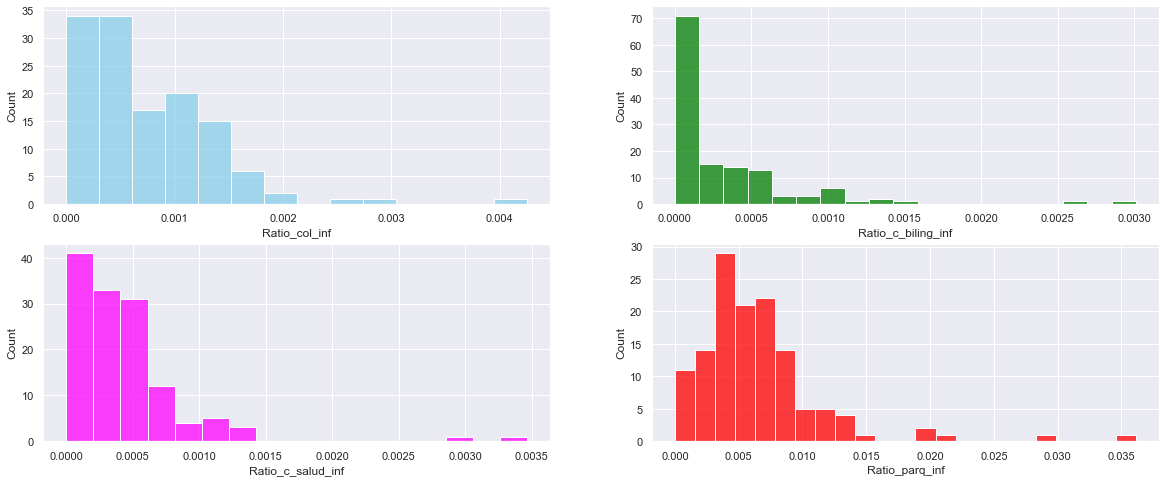

In [204]:
f, axes = plt.subplots(2, 2, figsize=(20,8), sharex=False, sharey = False) 
sns.histplot(datos_barrios["Ratio_col_inf"] , color="skyblue", label="Ratio_col_inf", ax = axes[0,0])
sns.histplot(datos_barrios["Ratio_c_biling_inf"] , color="green", label="Ratio_c_biling_inf", ax = axes[0,1])
sns.histplot(datos_barrios["Ratio_c_salud_inf"] , color="magenta", label="Ratio_c_salud_inf", ax = axes[1,0])
sns.histplot(datos_barrios["Ratio_parq_inf"] , color="red", label="Ratio_parq_inf", ax = axes[1,1]);

In [205]:
trace = go.Scatter(x = datos_barrios.index,
                    y = datos_barrios['Suma_Ratios'],
                    name = 'Suma de Ratios Estandarizados',
                    mode= 'lines',
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
                    text = datos_barrios['Barrio'])
data = [trace]

layout = dict(title = 'Suma de los Ratios Estandarizados por Barrio (índices)',
             xaxis= dict(title= 'Índice  del Barrio',ticklen= 5)
           )

fig = go.Figure(data = data, layout=layout)

iplot(fig)                    


C:\Users\Jesús\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



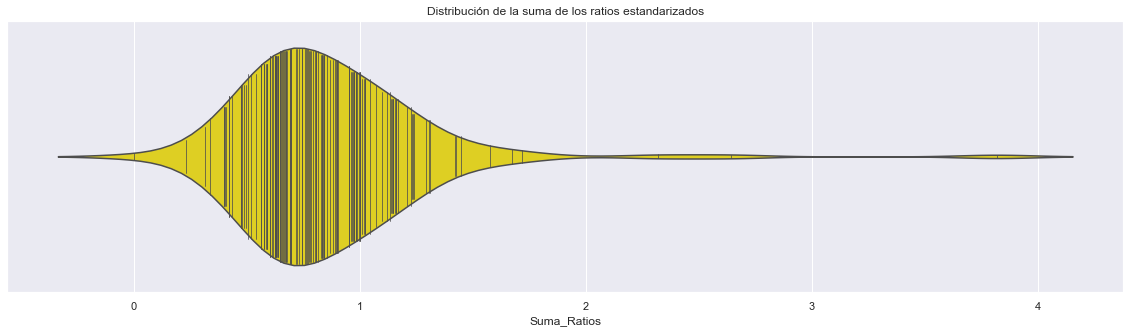

In [206]:
plt.figure(figsize=(20,5))
sns.violinplot(datos_barrios['Suma_Ratios'], color = '#fde904', inner = 'stick')
plt.title('Distribución de la suma de los ratios estandarizados');


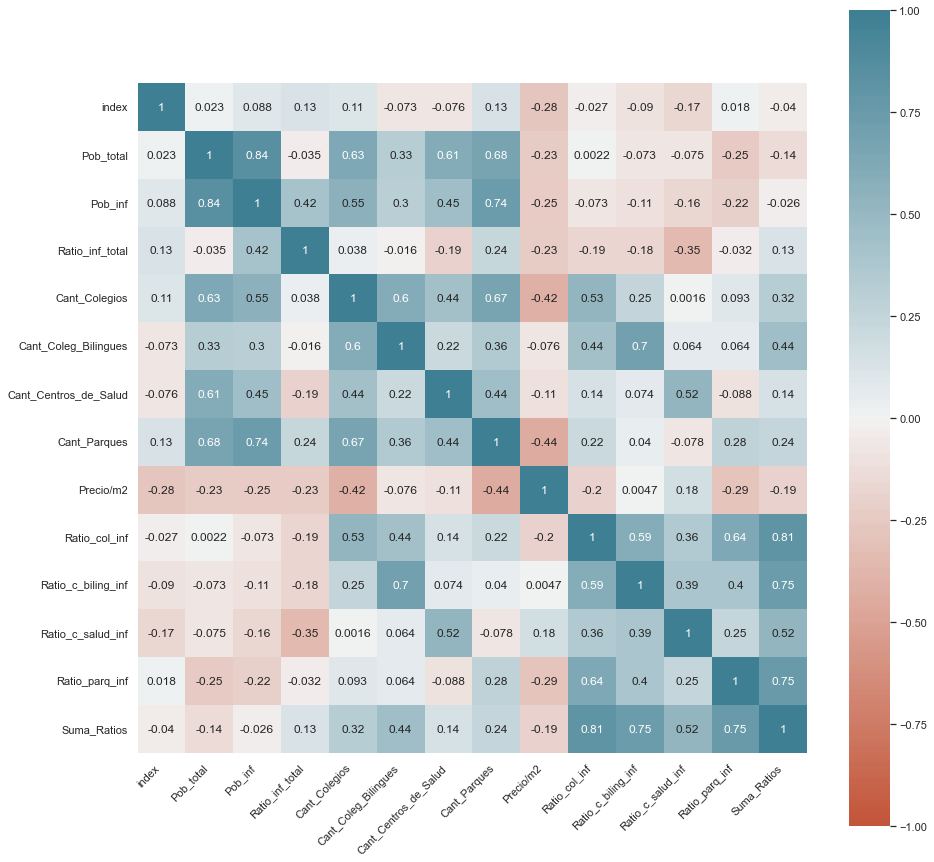

In [207]:
corr = datos_barrios.corr()
plt.figure(figsize=(15,15))
ax = sns.heatmap(
    corr,
    annot = True, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);


Concliusiones. Observamos los barrios con mayor valor en la suma de los ratios. Aplicaremos filtros de precio de la vivienda también para observar el comportamiento.

Text(0.5, 0, 'Barrios')

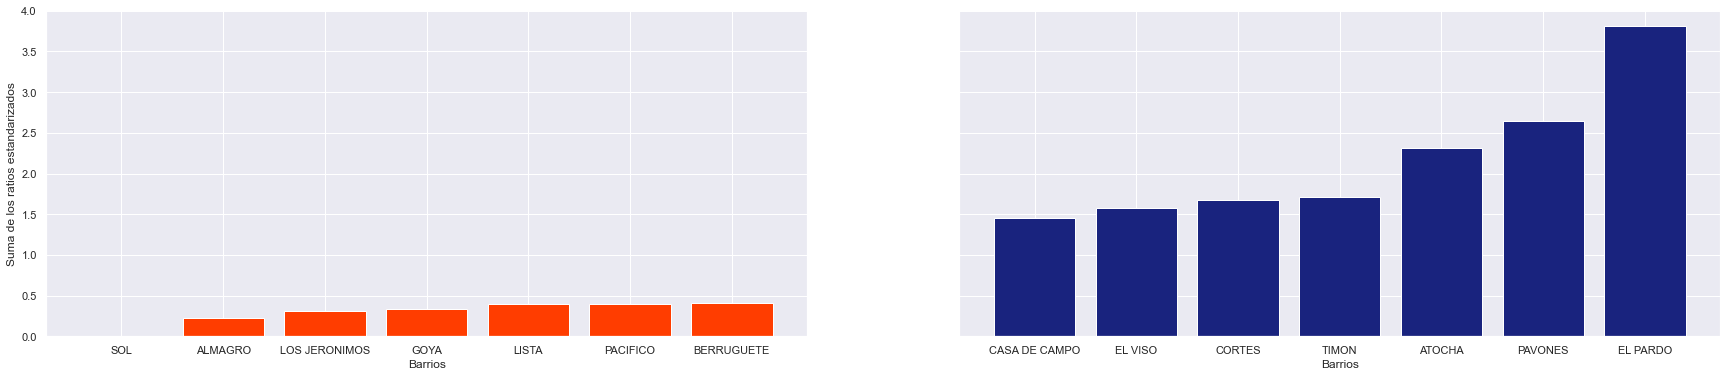

In [208]:
#Visualizamos los barrios con un mayor valor de suma de ratios y lo de menor valor. Sin filtro de precio.
min_suma = datos_barrios.sort_values('Suma_Ratios', ascending = True).head(7)
max_suma = datos_barrios.sort_values('Suma_Ratios', ascending = True).tail(7)
f, axes = plt.subplots(1,2, figsize=(30,6), sharex=False, sharey = True) 
axes[0].bar(min_suma['Barrio'],min_suma['Suma_Ratios'], color = '#ff3d00')
axes[0].set_xlabel('Barrios')
axes[0].set_ylabel('Suma de los ratios estandarizados')

axes[1].bar(max_suma['Barrio'],max_suma['Suma_Ratios'], color = '#19237e')
axes[1].set_xlabel('Barrios')



Text(0.5, 0, 'Barrios')

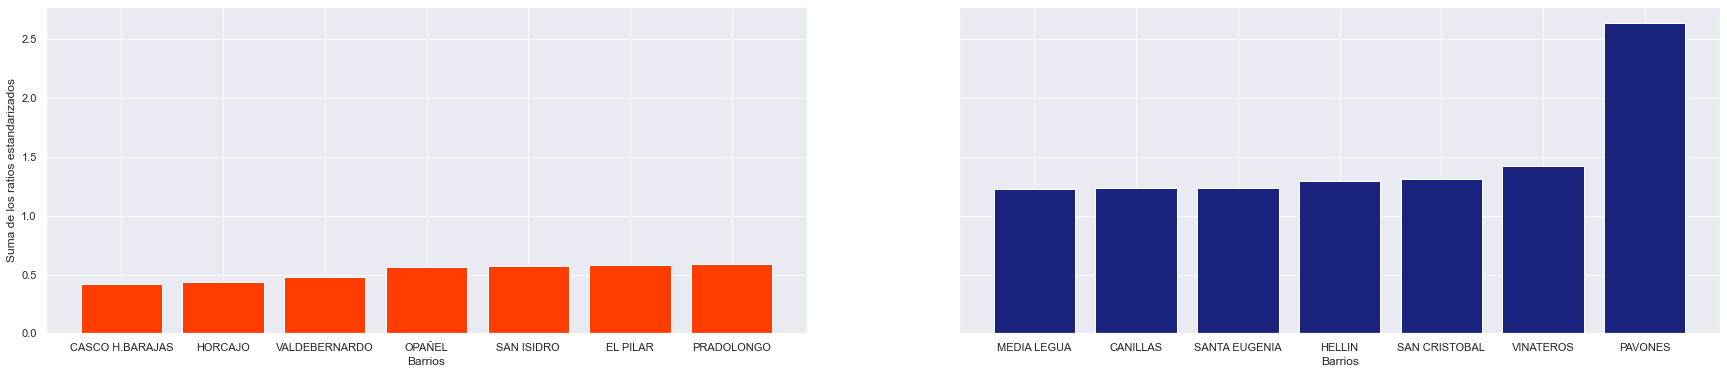

In [209]:
#Visualizamos los mismos gráficos pero con el precio limitado a la mediana de estos.
datos_barrios_precios = datos_barrios[datos_barrios['Precio/m2'] <= datos_barrios['Precio/m2'].median()]
min_suma_precios = datos_barrios_precios.sort_values('Suma_Ratios', ascending = True).head(7)
max_suma_precios = datos_barrios_precios.sort_values('Suma_Ratios', ascending = True).tail(7)
f, axes = plt.subplots(1,2, figsize=(30,6), sharex=False, sharey = True) 
axes[0].bar(min_suma_precios['Barrio'],min_suma_precios['Suma_Ratios'], color = '#ff3d00')
axes[0].set_xlabel('Barrios')
axes[0].set_ylabel('Suma de los ratios estandarizados')

axes[1].bar(max_suma_precios['Barrio'],max_suma_precios['Suma_Ratios'], color = '#19237e')
axes[1].set_xlabel('Barrios')


Text(0.5, 0, 'Barrios')

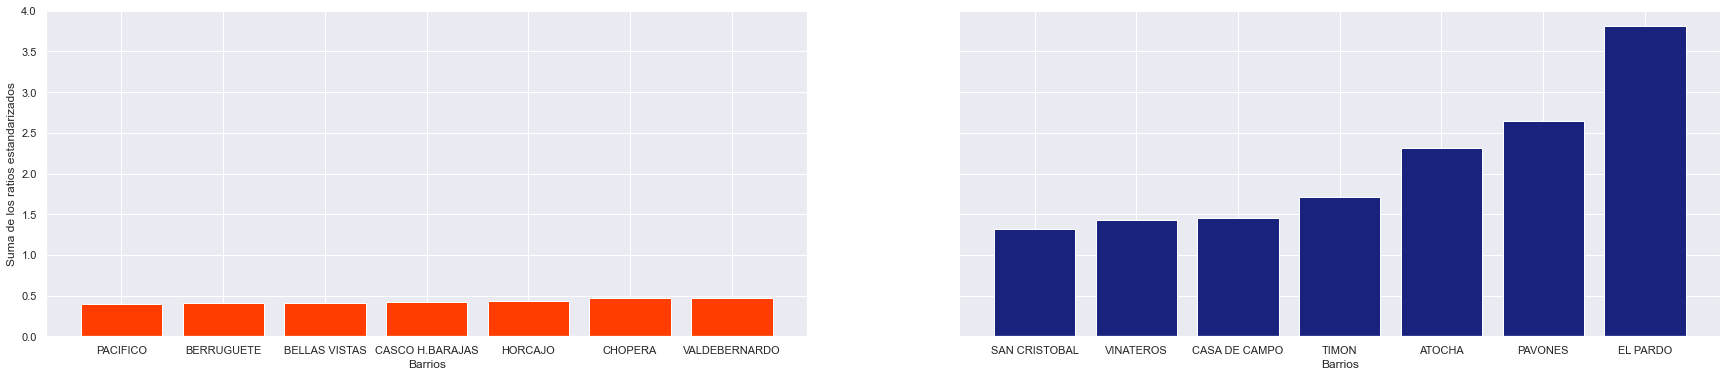

In [210]:
#Visualizamos los mismos gráficos pero con el precio limitado al quantile 75 de estos.
datos_barrios_quant = datos_barrios[datos_barrios['Precio/m2'] <= datos_barrios['Precio/m2'].quantile(0.75)]
min_suma_quant = datos_barrios_quant.sort_values('Suma_Ratios', ascending = True).head(7)
max_suma_quant = datos_barrios_quant.sort_values('Suma_Ratios', ascending = True).tail(7)
f, axes = plt.subplots(1,2, figsize=(30,6), sharex=False, sharey = True) 
axes[0].bar(min_suma_quant['Barrio'],min_suma_quant['Suma_Ratios'], color = '#ff3d00')
axes[0].set_xlabel('Barrios')
axes[0].set_ylabel('Suma de los ratios estandarizados')

axes[1].bar(max_suma_quant['Barrio'],max_suma_quant['Suma_Ratios'], color = '#19237e')
axes[1].set_xlabel('Barrios')